In [1]:
# 图像查看
from datasets import nii_loader
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
import torch

bssfp = nii_loader(str='C0',is_label=False)
lge = nii_loader(str='LGE',is_label=False)

In [7]:
real_bssfp = bssfp['image'][1]
real_lge1 = lge['image'][1]
d1 = sitk.ReadImage('datasets/train/fake_lge/patient1_C0_2.nii.gz')
d2 = sitk.GetArrayFromImage(d1)
fake_lge = np.squeeze(d2)

trans = transforms.Resize((256,256))
#real_lge = trans(torch.Tensor(real_lge1).unsqueeze(dim=0)).numpy().squeeze(axis=0)
real_lge = real_lge1

print(real_bssfp.shape)
print(real_bssfp.max())
print(real_bssfp.min())

print(real_lge.shape)
print(real_lge.max())
print(real_lge.min())

print(fake_lge.shape)
print(fake_lge.max())
print(fake_lge.min())


(256, 256)
2258.0
0.0
(512, 512)
2069.0
0.0
(256, 256)
0.9738996
-1.0


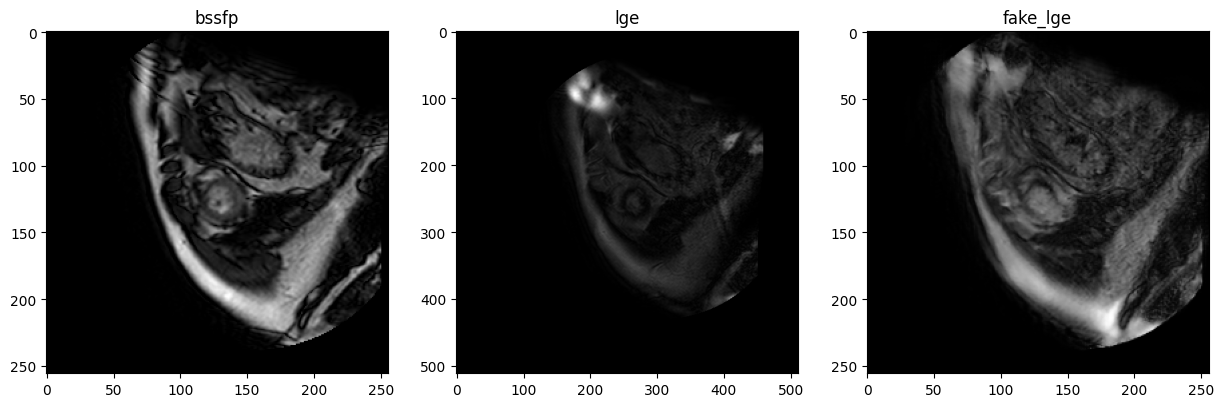

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1).set_title('bssfp')
plt.imshow(real_bssfp,cmap='gray')
plt.subplot(1,3,2).set_title('lge')
plt.imshow(real_lge,cmap='gray')
plt.subplot(1,3,3).set_title('fake_lge')
plt.imshow(fake_lge,cmap='gray')

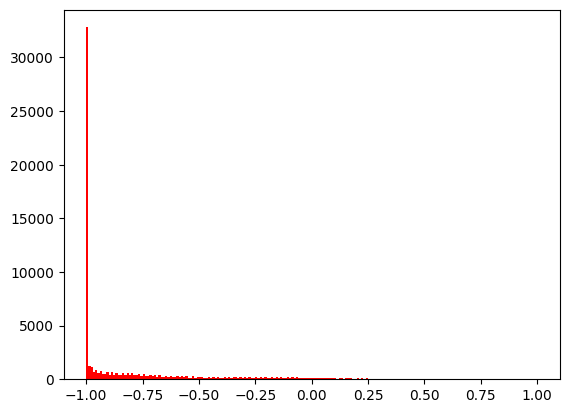

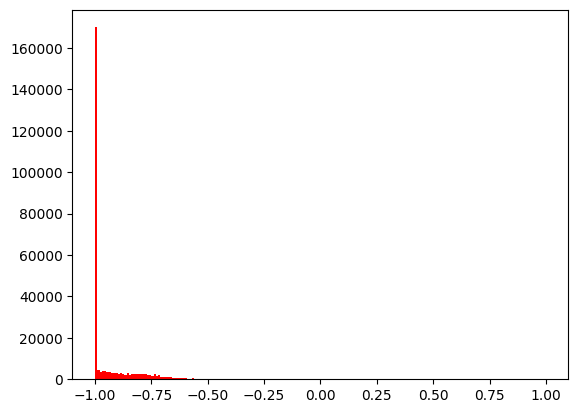

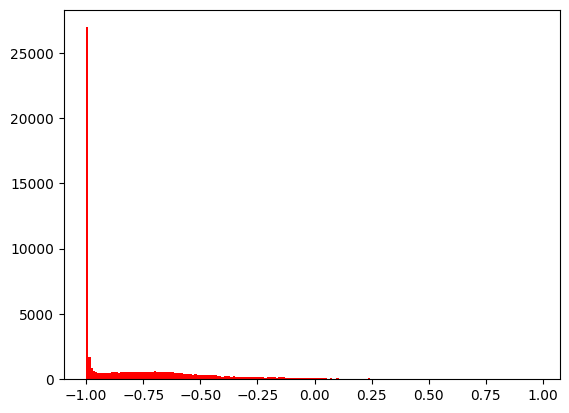

In [9]:
# convert to [-1,1]
from utils import minmax_normal
import torch
real_bssfp1 = torch.tensor(real_bssfp).unsqueeze(dim=0)
real_lge1 = torch.tensor(real_lge).unsqueeze(dim=0)
ibssfp = minmax_normal(real_bssfp1)
ilge = minmax_normal(real_lge1)
from utils import drawhistogram
drawhistogram(ibssfp.numpy().squeeze(axis=0))
drawhistogram(ilge.numpy().squeeze(axis=0))
drawhistogram(fake_lge)